# yfinance Library Assignment  

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELIANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.

In [3]:
def fetch_stock_data(ticker, start_date, end_date,timeframe='1d'):
    """
    Fetch historical stock data from Yahoo Finance.
    
    :param ticker: Stock ticker symbol
    :param start_date: Start date for fetching data (YYYY-MM-DD)
    :param end_date: End date for fetching data (YYYY-MM-DD)
    :param timeframe: Timeframe for the data (default is '1d')
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)
    return stock_data 

### Visualization

Create a function for plotting the stock closing prices. This function should accept parameters for the plot and its objective is to display the graph.
   


In [4]:
def visualize_stock_data(stock_data, ticker):
    """
    Visualize stock data with a line chart.
    
    :param stock_data: DataFrame containing stock data
    :param ticker: Stock ticker symbol
    """
    plt.figure(figsize=(14, 7))
    x_points = stock_data.index
    y_points = stock_data['Close'].values
    plt.plot(x_points, y_points, label='Close Price', color='blue')
    plt.title(f'{ticker} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

### Run the functions 

**Choose Stocks:**  
   - Select any three stocks of your choice.
   - Fetch their data for the time period from **2012 to 2022**.
   - Select daily time frame i.e. 1d.

**Plot the Data:**  
   1. Plot the data for each stock separately.  
   2. Combine the data and plot all three stocks on the **same graph** for comparison.

C:\Users\Dell\AppData\Local\Temp\ipykernel_2388\3483663462.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


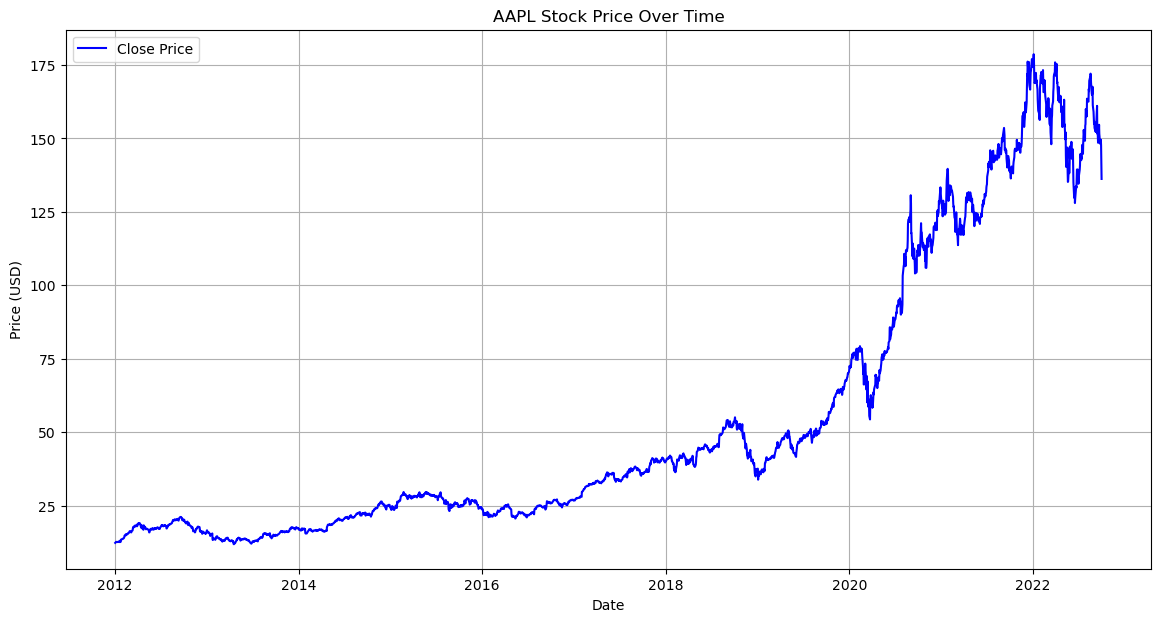

C:\Users\Dell\AppData\Local\Temp\ipykernel_2388\3483663462.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


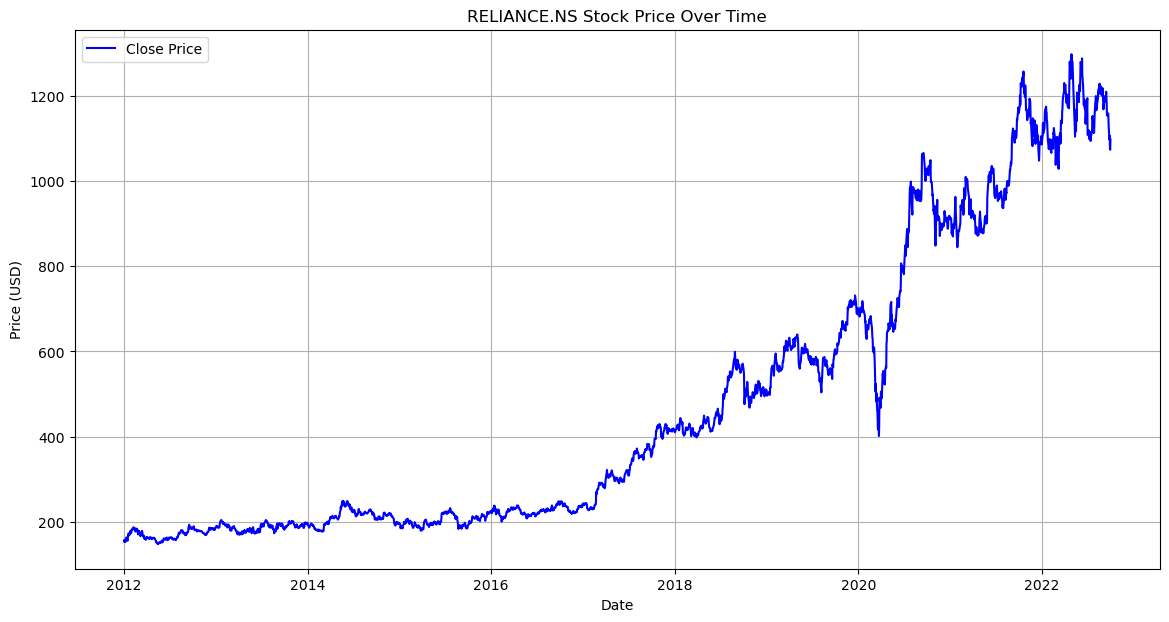

C:\Users\Dell\AppData\Local\Temp\ipykernel_2388\3483663462.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


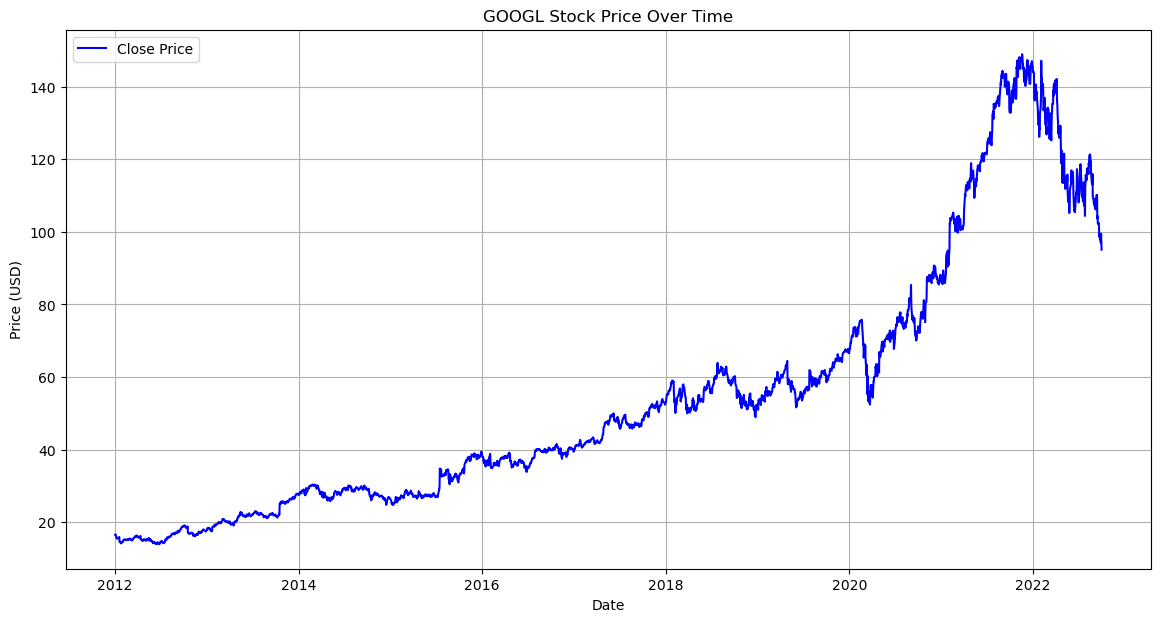

In [18]:
stock1 = 'AAPL'
stock2 = 'RELIANCE.NS'
stock3 = 'GOOGL'
start_date = '2012-01-01'
end_date = '2022-10-01'
time_frame = '1d'
stock_data_1 = fetch_stock_data(stock1, start_date, end_date, time_frame)
visualize_stock_data(stock_data_1, stock1)
stock_data_2 = fetch_stock_data(stock2, start_date, end_date, time_frame)
visualize_stock_data(stock_data_2, stock2)
stock_data_3 = fetch_stock_data(stock3, start_date, end_date, time_frame)
visualize_stock_data(stock_data_3, stock3)

### Technical Analysis 

**Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)**  
   - Plot the SMA and EMA of 5 days of each of the three stocks that you have selected.
   - SMA and EMA graph should be plotted on the same graph 
   - Hence you have to plot three graphs of each stock with SMA and EMA
    

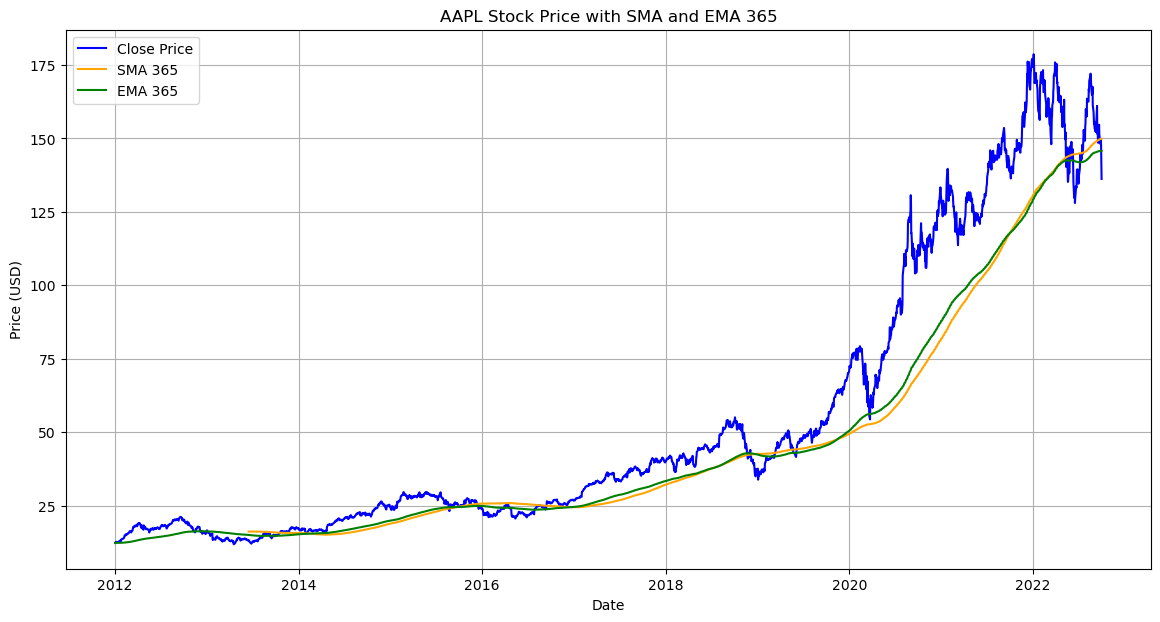

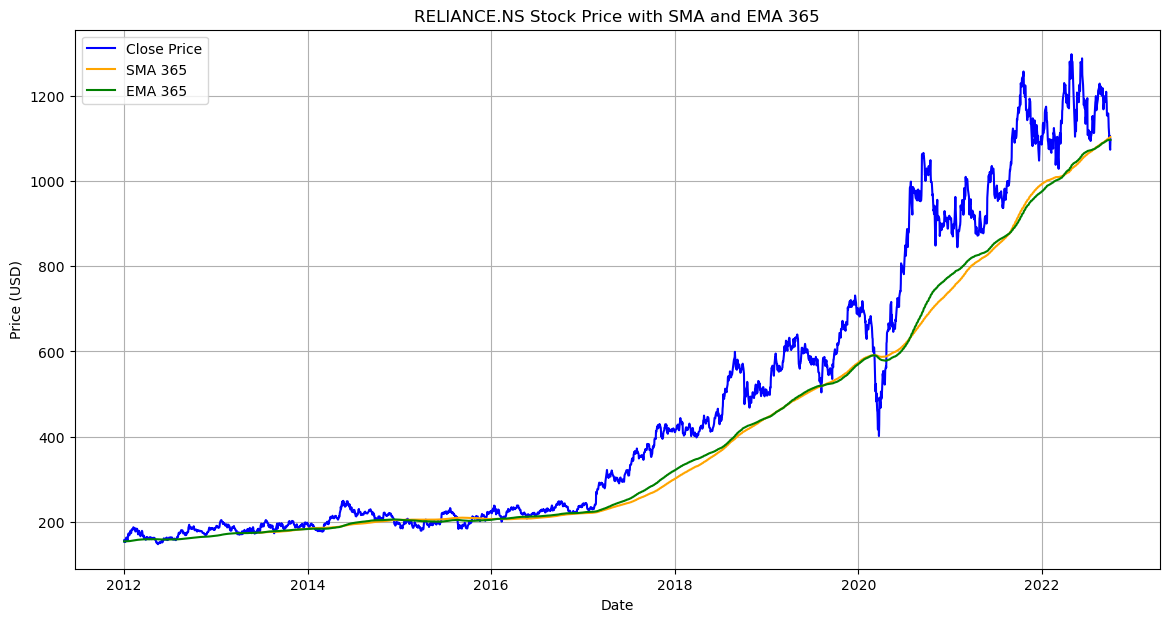

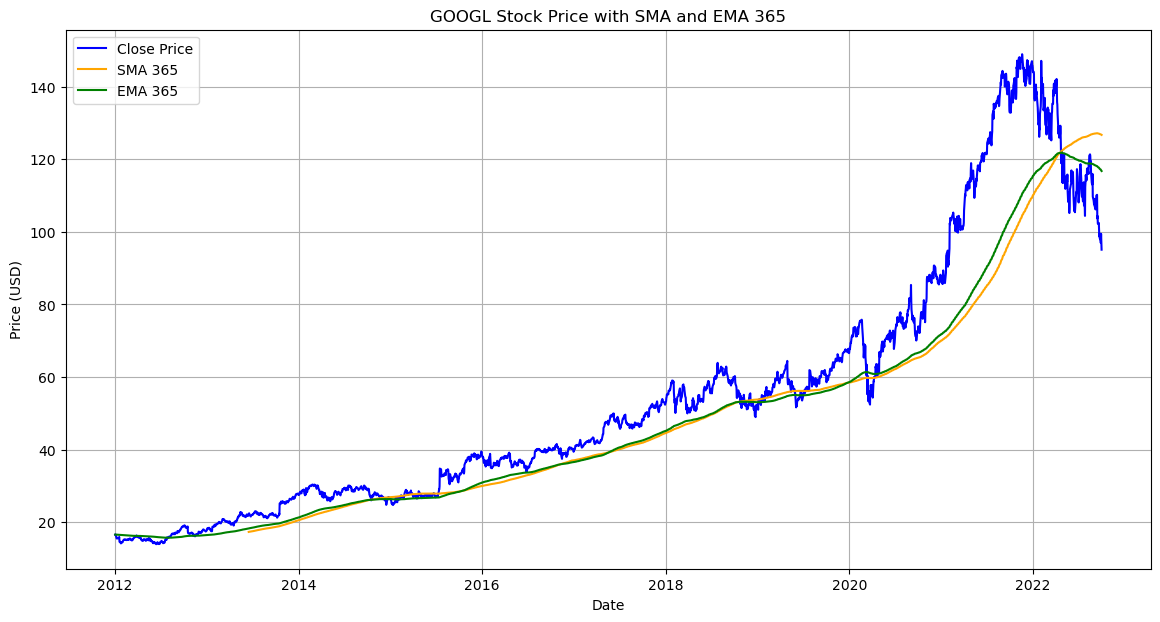

In [19]:
def SMA(data, window):
    """
    Calculate Simple Moving Average (SMA).
    
    :param data: Series of stock prices
    :param window: Window size for SMA
    :return: Series with SMA values
    """
    return data.rolling(window=window).mean()

def EMA(data, window):
    """
    Calculate Exponential Moving Average (EMA).
    
    :param data: Series of stock prices
    :param window: Window size for EMA
    :return: Series with EMA values
    """
    return data.ewm(span=window, adjust=False).mean()

def plot_sma_ema(stock_data, ticker, window):
    """
    Plot stock data with SMA overlay.
    
    :param stock_data: DataFrame containing stock data
    :param ticker: Stock ticker symbol
    :param window: Window size for SMA
    """
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    sma = SMA(stock_data['Close'], window)
    plt.plot(stock_data.index, sma, label=f'SMA {window}', color='orange')
    plt.title(f'{ticker} Stock Price with SMA{window}')
    ema = EMA(stock_data['Close'], window)
    plt.plot(stock_data.index, ema, label=f'EMA {window}', color='green')
    plt.title(f'{ticker} Stock Price with SMA and EMA {window}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

plot_sma_ema(stock_data_1, stock1, 365)
plot_sma_ema(stock_data_2, stock2, 365)
plot_sma_ema(stock_data_3, stock3, 365)

**MACD**  
   - Plot MACD and Signal line for each of the three stocks.
   - Fast Length (Short-term EMA): 12 periods
   - Slow Length (Long-term EMA): 26 periods
   - Signal Line (Smoothing EMA): 9 periods


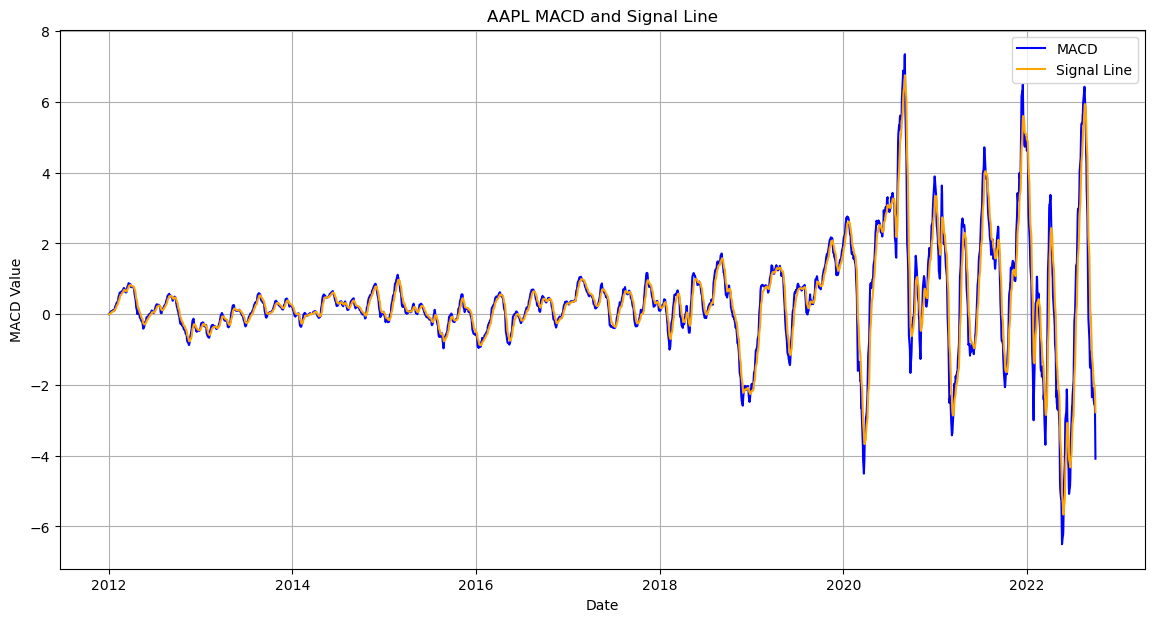

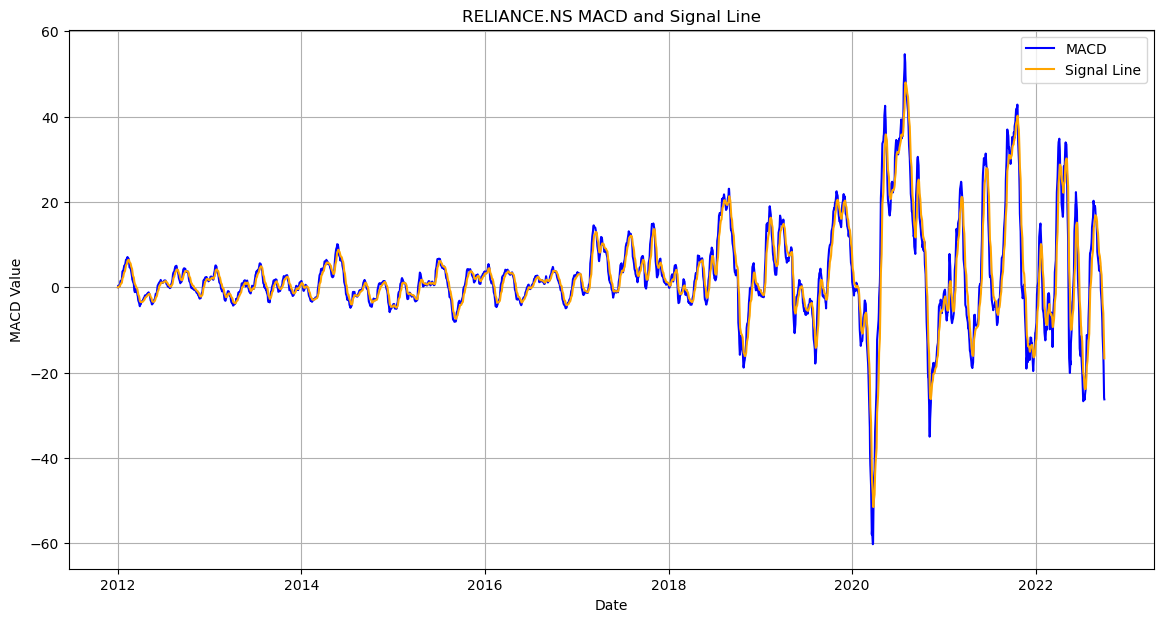

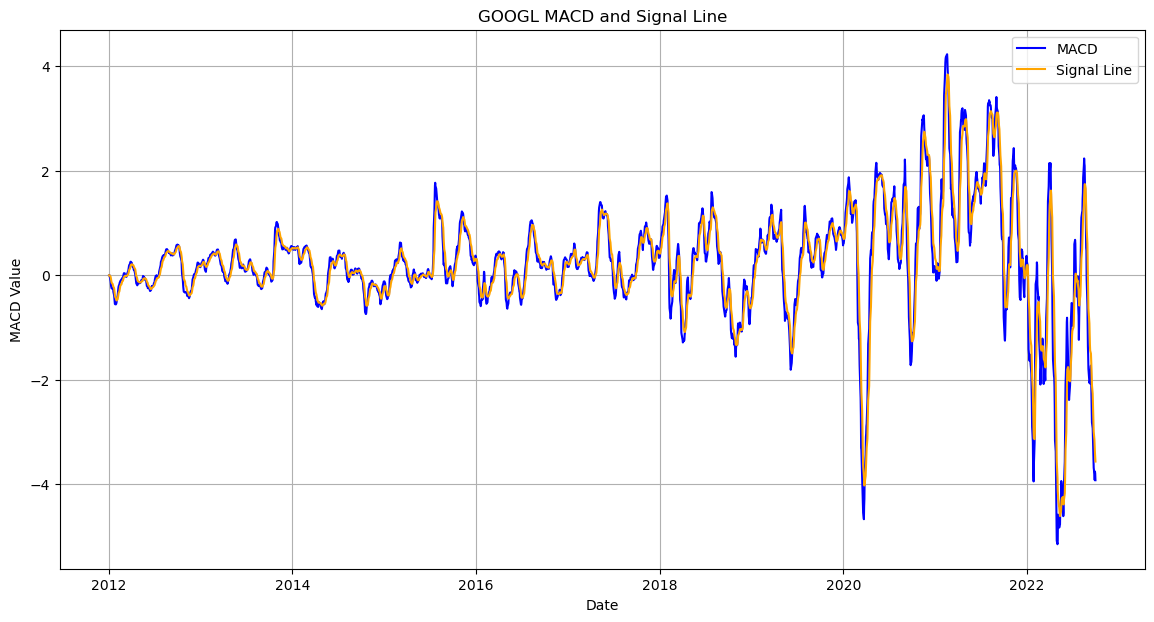

In [20]:
def MACD(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate Moving Average Convergence Divergence (MACD).
    
    :param data: Series of stock prices
    :param short_window: Short window size for MACD
    :param long_window: Long window size for MACD
    :param signal_window: Signal line window size
    :return: DataFrame with MACD and Signal line
    """
    short_ema = EMA(data, short_window)
    long_ema = EMA(data, long_window)
    macd = short_ema - long_ema
    signal = EMA(macd, signal_window)
    return [macd, signal]

def plot_macd(stock_data, ticker,short_window=12, long_window=26, signal_window=9):
    """
    Plot MACD and Signal line.
    
    :param stock_data: DataFrame containing stock data
    :param ticker: Stock ticker symbol
    :param short_window: Short window size for MACD
    :param long_window: Long window size for MACD
    :param signal_window: Signal line window size
    """
    macd, signal = MACD(stock_data['Close'], short_window, long_window, signal_window)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, macd, label='MACD', color='blue')
    plt.plot(stock_data.index, signal, label='Signal Line', color='orange')
    plt.title(f'{ticker} MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid()
    plt.show()

plot_macd(stock_data_1, stock1)
plot_macd(stock_data_2, stock2)
plot_macd(stock_data_3, stock3)

**RSI**  
   - Plot RSI for each of the three stocks
   - Period = 14 days 
   - Also show the overbought and oversold regions 
   - Overbought condition: RSI above 70
   - Oversold condition: RSI below 30
   

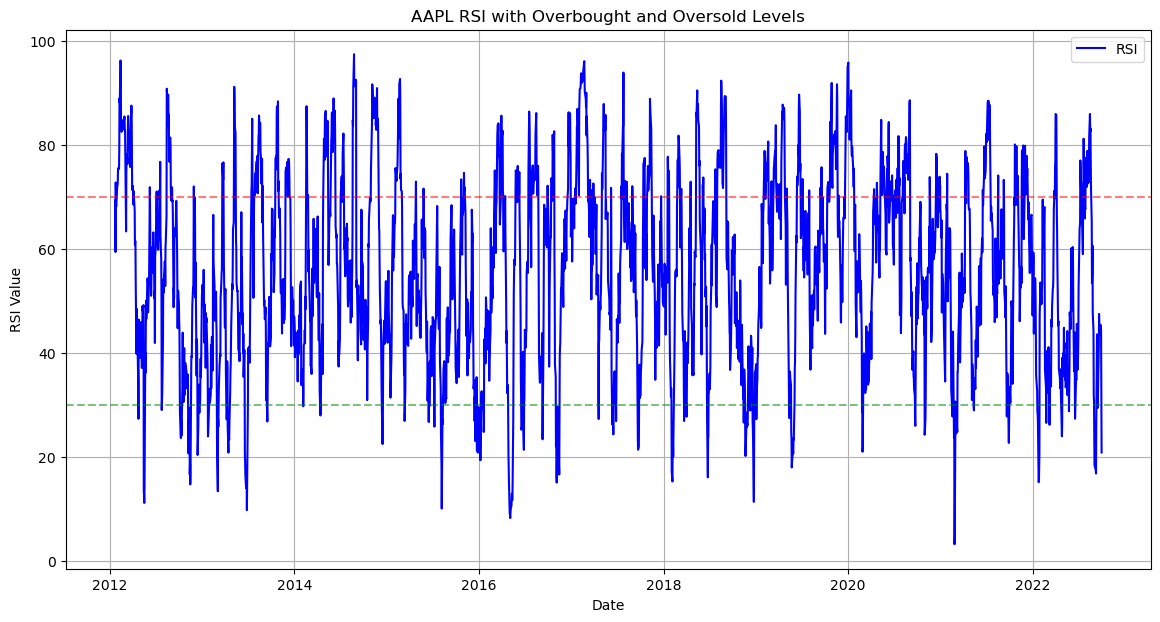

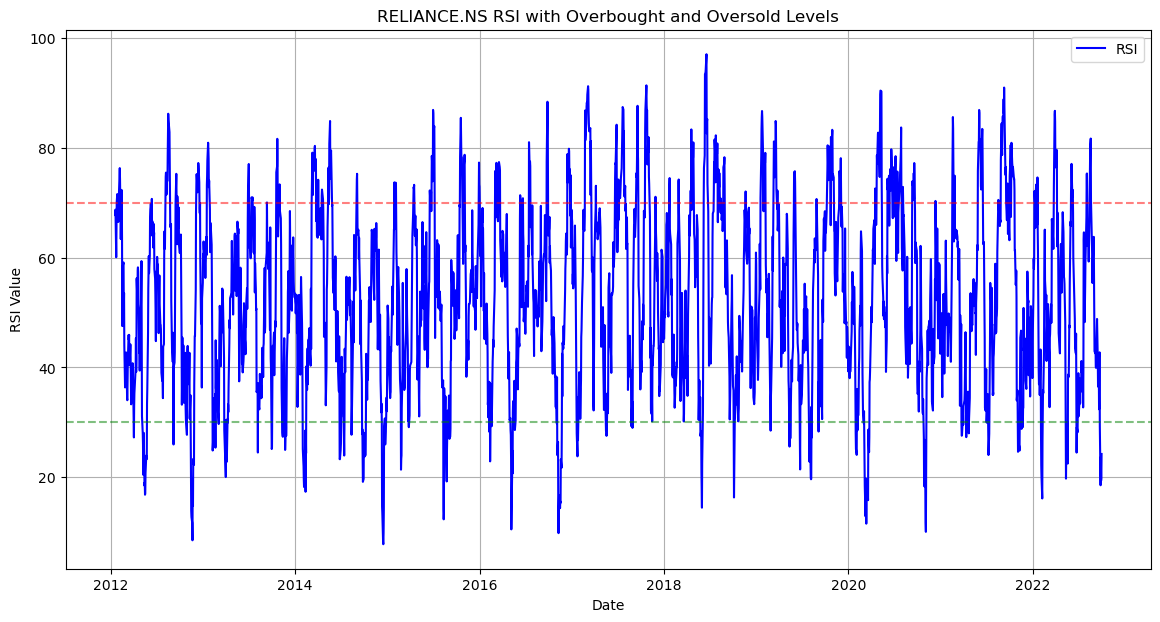

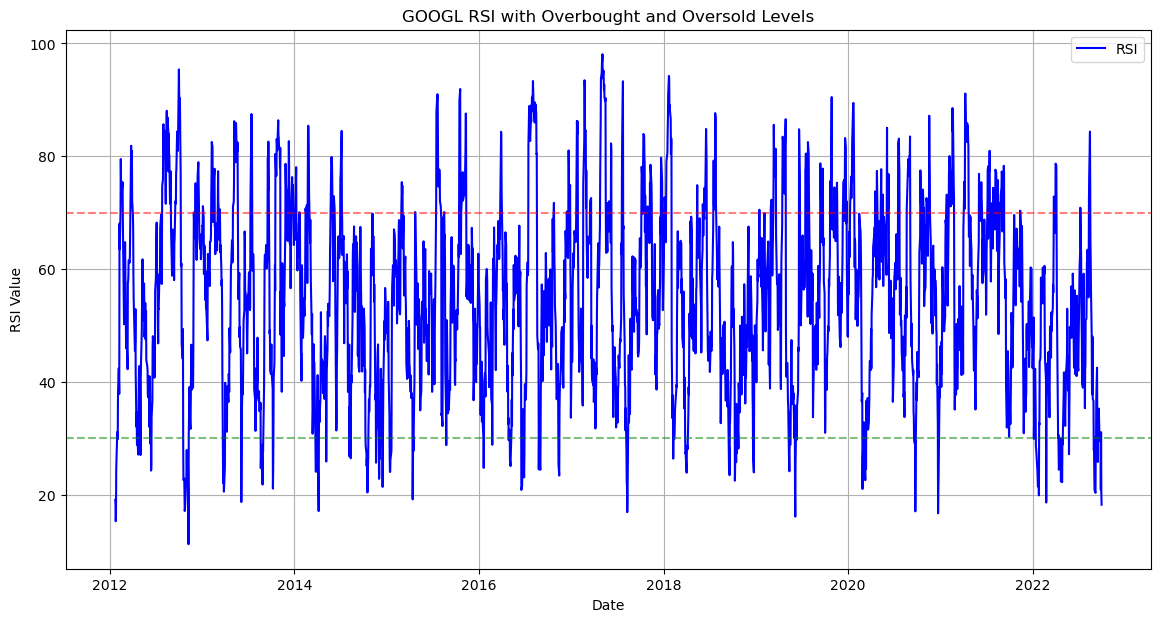

In [21]:
def RSI(data, window=14):
    """
    Calculate Relative Strength Index (RSI).
    
    :param data: Series of stock prices
    :param window: Window size for RSI
    :return: Series with RSI values
    """
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def Overbought_Oversold(rsi):

    """
    Determine if RSI indicates overbought or oversold conditions.
    
    :param rsi: Series with RSI values
    :return: Series with 'Overbought', 'Oversold', or 'Neutral' labels
    """
    conditions = [
        (rsi > 70),
        (rsi < 30)
    ]
    choices = ['Overbought', 'Oversold']
    return pd.Series(pd.cut(rsi, bins=[0, 30, 70, 100], labels=choices + ['Neutral'], include_lowest=True))

def plot_rsi(stock_data, ticker, window=14):
    """
    Plot RSI with overbought and oversold levels.
    
    :param stock_data: DataFrame containing stock data
    :param ticker: Stock ticker symbol
    :param window: Window size for RSI
    """
    rsi = RSI(stock_data['Close'], window)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, rsi, label='RSI', color='blue')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')
    plt.title(f'{ticker} RSI with Overbought and Oversold Levels')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid()
    plt.show()

plot_rsi(stock_data_1, stock1)
plot_rsi(stock_data_2, stock2)
plot_rsi(stock_data_3, stock3)


### Summarize your analysis

Visulizing the graph of the there companies,
All the there companies have gain hugh gain since 2020.

While Apple and Reliance are at the peak of the uptrend, there are very high changes that the stock prices would go down and is will be a good idea to exit.

While Google on the other hand shows a downward trend and will continue till a higher minima is not achieved.


EMA is the exponential average while SMA is stanadard average, hence SMA crossing EMA shows that the there is a downtrend while EMA>SMA is something which is expected.

Apple's yellow line crosses green which is a good sign.

FOr reliance both coincides showcasing stability.

For Google the yellow beats green drastically showing uptrend.


MACD being negative shows bearish behaviour which is observed in great proportion in the 3 stocks.

We should invest short in such situation as the value is fluctuating very high having good marginal opportunity.


PLoting RSI we get that all the 3 stocks are oversold and hence the stock is shows that it is good for buying the stock.